Q1. We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit             
Data                       
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25     
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plo


In [2]:
max_temp=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [3]:
temp_max=np.array(max_temp)
temp_min=np.array(min_temp)

In [4]:
months=np.arange(12)

Text(0, 0.5, 'min and max temperature')

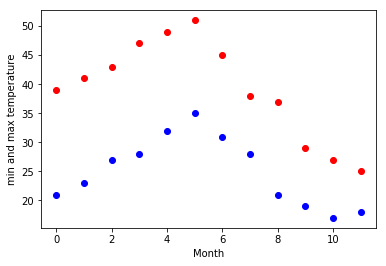

In [5]:
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel('Month')
plt.ylabel('min and max temperature')

In [6]:
from scipy import optimize
def yearly_temps(times,avg,ampl,time_offset):
    return (avg + ampl*np.cos((times+time_offset)*2*np.pi/times.max()))
res_max,cov_max=optimize.curve_fit(yearly_temps,months,temp_max,[20,10,0])
res_min,cov_min=optimize.curve_fit(yearly_temps,months,temp_min,[-40,20,0])


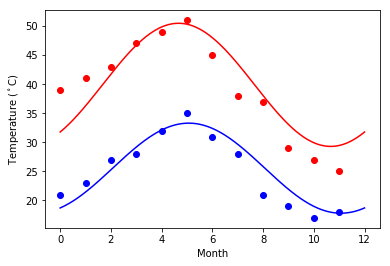

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Q2. Matplotlib:
    
    This assignment is for visualization using matplotlib:
        
        data to use:
            url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
            
                titanic = pd.read_csv(url)
                Charts to plot:
                    1. Create a pie chart presenting the male/female proportion
                    2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [8]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic=pd.read_csv(url)
#titanic=titanic.dropna(how='any')
#titanic=titanic.reset_index(drop=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
title_type = titanic.groupby('sex').agg('count')
print(title_type)

        pclass  survived  name  age  sibsp  parch  ticket  fare  cabin  \
sex                                                                      
female     466       466   466  388    466    466     466   466    141   
male       843       843   843  658    843    843     843   842    154   

        embarked  boat  body  home.dest  
sex                                      
female       464   319     8        288  
male         843   167   113        457  


1. Create a pie chart presenting the male/female proportion

In [10]:
type_labels = title_type.pclass.sort_values().index
print(type_labels)
type_counts = title_type.pclass.sort_values()
print(type_counts)

Index(['female', 'male'], dtype='object', name='sex')
sex
female    466
male      843
Name: pclass, dtype: int64


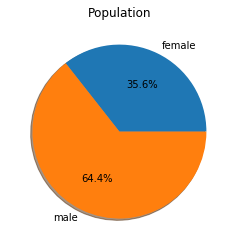

In [11]:
plt.subplot(aspect=1, title='Population')
sex_pclass = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True)
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

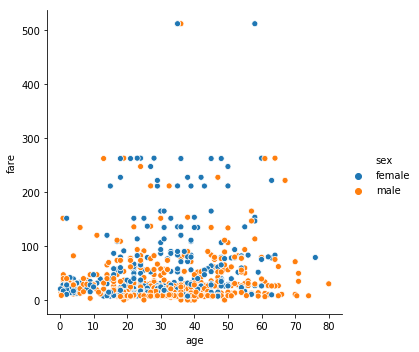

In [12]:
sns.relplot(y='fare',x='age',data=titanic,hue='sex')